Reading data and basic stuff

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import os
#print(os.listdir("../input"))
data=pd.read_csv("data/train.csv");
#a=data.loc[:,['Fare','Survived']];
#a=data.loc[:,['Age','Survived']];

df = pd.DataFrame(data);
plt.rcParams['figure.figsize']=(10,10)

Basic plotting with  grouping by age. inspecting the correlation of age with  survival

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


visualization for correlation

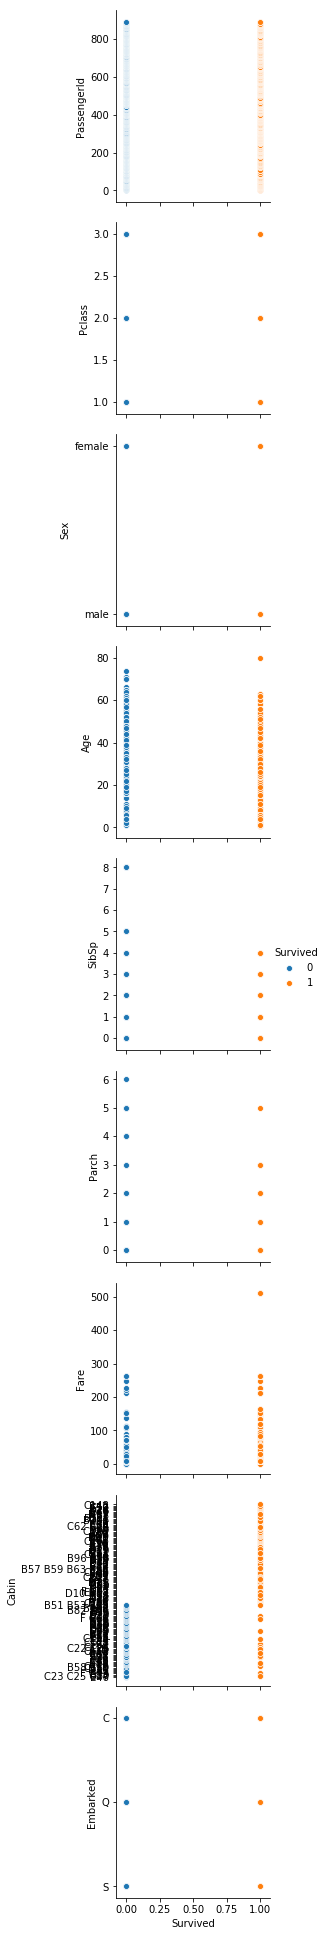

In [24]:
g = sns.pairplot(df, height=3,hue='Survived',y_vars=["PassengerId", "Pclass",
                                                     'Sex','Age','SibSp','Parch','Fare','Cabin','Embarked'],
                 x_vars=["Survived"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4946e66d68>,
      dtype=object)

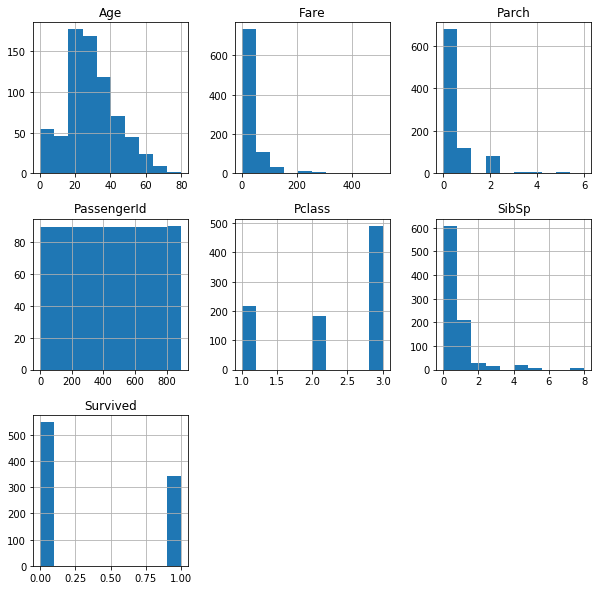

In [25]:
df.hist()

In [ ]:
# normal plot
ageBracketSurvival = df.groupby('Age').sum();
#print(ageBracketSurvival);
plt.xlabel("Age");
plt.ylabel("No of survivors");
plt.plot(ageBracketSurvival['Survived']);
ageBracketSurvival.T

#binning and plotting with histogram

This would look a little better if we group by age range and do a boxplot. and also histogram. Drawing them is very simple

In [ ]:
df.boxplot(column="Age",by="Survived");
df.hist(column="Age",by="Survived",bins=10);


Crosstab for quick check. And also More involved binning code for other purpose

In [ ]:
#Binning:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

"""
#Binning age:
cut_points = [90,140,190]
labels = ["low","medium","high","very high"]
data["LoanAmount_Bin"] = binning(data["LoanAmount"], cut_points, labels)
print pd.value_counts(data["LoanAmount_Bin"], sort=False)
"""

survived = df.loc[df['Survived']==1,:];
dead = df.loc[df['Survived']==0,:];
df.describe()

cut_points = [8,15,31];
labels = ["low","med","high","veryHigh"];

df["Fare Range"] = binning(df["Fare"],cut_points,labels);

pd.crosstab(df["Fare Range"],df["Survived"],margins=True)
pd.crosstab(df["Pclass"],df["Survived"],margins=True)